In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_hdf('data-p1/agg_polls_by_day.h5')
df

,pollster,state,population,day,weighted_clinton,weighted_trump,samplesize_total,c-minus-t
0,ABC News/Washington Post,Maryland,lv,2016-09-27,63.0,27.0,706.0,36.0
1,ABC News/Washington Post,Maryland,lv,2016-09-28,63.0,27.0,706.0,36.0
2,ABC News/Washington Post,Maryland,lv,2016-09-29,63.0,27.0,706.0,36.0
3,ABC News/Washington Post,Maryland,lv,2016-09-30,63.0,27.0,706.0,36.0
4,ABC News/Washington Post,Maryland,rv,2016-03-30,63.0,28.0,752.0,35.0
...,...,...,...,...,...,...,...,...
20292,icitizen,U.S.,rv,2016-09-15,42.0,37.0,1000.0,5.0
20293,icitizen,U.S.,rv,2016-09-16,42.0,37.0,1000.0,5.0
20294,icitizen,U.S.,rv,2016-09-17,42.0,37.0,1000.0,5.0
20295,icitizen,U.S.,rv,2016-09-18,42.0,37.0,1000.0,5.0


In [51]:
# Sample weighted_average function
def weighted_average(group, value_column):
    sqrt_sample_sizes = group['samplesize_total'] ** 0.5
    median_sqrt_sample_size = group['samplesize_total'].median() ** 0.5
    weights = sqrt_sample_sizes / median_sqrt_sample_size
    return (group[value_column] * weights).sum() / weights.sum()


# Group by 'day' and apply the weighted average
df_agg = df.groupby(['day','state','population']).apply(lambda group: weighted_average(group, 'c-minus-t'))

# Reset the index to make 'day' a regular column again
df_agg = df_agg.reset_index()

df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c-minus-t'})

# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

C:\Users\mairi\AppData\Local\Temp\ipykernel_23056\3719212049.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['day','state','population']).apply(lambda group: weighted_average(group, 'c-minus-t'))


In [52]:
df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c-minus-t'})

# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
            day           state population  c-minus-t
0    2015-11-06   New Hampshire         rv   7.000000
1    2015-11-07   New Hampshire         rv   7.000000
2    2015-11-07  South Carolina          v  -5.000000
3    2015-11-08   New Hampshire         rv   7.000000
4    2015-11-08  South Carolina          v  -5.000000
...         ...             ...        ...        ...
8630 2016-11-07        Virginia         lv   7.854979
8631 2016-11-07      Washington         lv  15.657220
8632 2016-11-07   West Virginia         lv -26.740909
8633 2016-11-07       Wisconsin         lv   5.941443
8634 2016-11-07         Wyoming         lv -31.856953

[8635 rows x 4 columns]


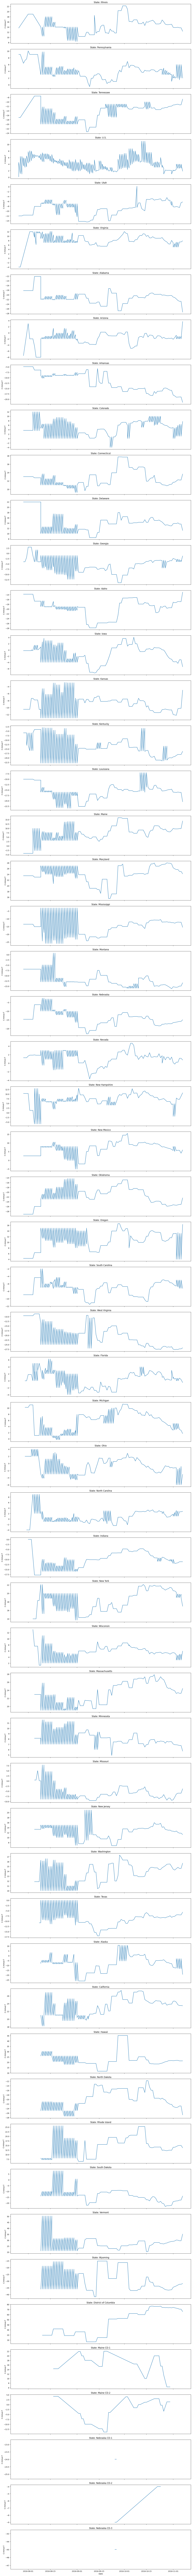

In [71]:
df_agg = df_agg[df_agg['day']>=pd.to_datetime('2016-07-26')] # offical nominations complete
states = df_agg['state'].unique()

# Create a subplot for each state
fig, axes = plt.subplots(nrows=len(states), ncols=1, figsize=(15, 200), sharex=True)

# Loop through each state and create a plot
for i, state in enumerate(states):
    state_data = df_agg[df_agg['state'] == state]
    axes[i].plot(state_data['day'], state_data['c-minus-t'], marker=None)
    axes[i].set_title(f'State: {state}')
    axes[i].set_ylabel('C-minus-T')

# Label the x-axis only for the last subplot
axes[-1].set_xlabel('Date')

# Adjust the layout
plt.tight_layout()

# Display the stacked plots
plt.show()

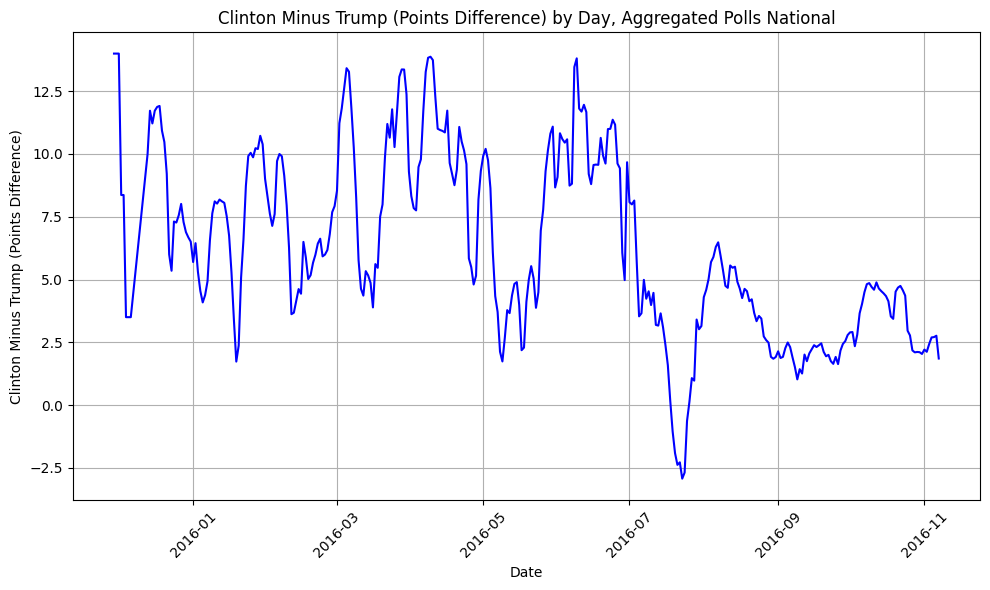

In [59]:
target = df_agg[(df_agg['state'] == "U.S.") & (df_agg['population'] == 'lv')]

# Plot 'c-minus-t' by day
plt.figure(figsize=(10, 6))
plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Clinton Minus Trump (Points Difference)')
plt.title('Clinton Minus Trump (Points Difference) by Day, Aggregated Polls National')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\mairi\AppData\Local\Temp\ipykernel_23056\906783962.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coefficients = np.polyfit(df_agg['day_numeric'], df_agg['c-minus-t'], deg=30)


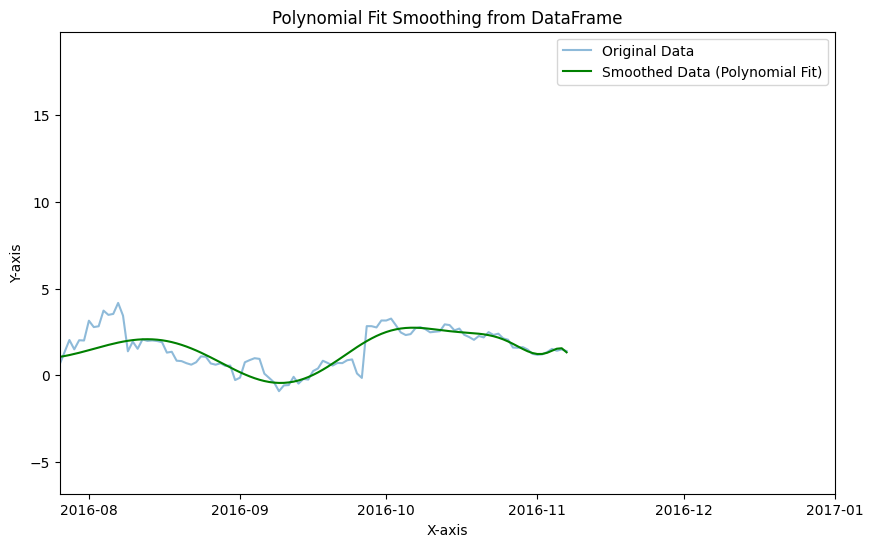

In [25]:

# df_agg['day_numeric'] = (df_agg['day'] - df_agg['day'].min()).dt.days 

# poly_coefficients = np.polyfit(df_agg['day_numeric'], df_agg['c-minus-t'], deg=30)
# df_agg['Y_poly_smooth'] = np.polyval(poly_coefficients, df_agg['day_numeric'])

# plt.figure(figsize=(10, 6))


# plt.plot(df_agg['day'], df_agg['c-minus-t'], label='Original Data', alpha=0.5)
# plt.plot(df_agg['day'], df_agg['Y_poly_smooth'], label='Smoothed Data (Polynomial Fit)', color='green')

# plt.xlim(pd.to_datetime('2016-07-26'), pd.to_datetime('2017-01-01'))

# plt.title("Polynomial Fit Smoothing from DataFrame")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")

# plt.show()